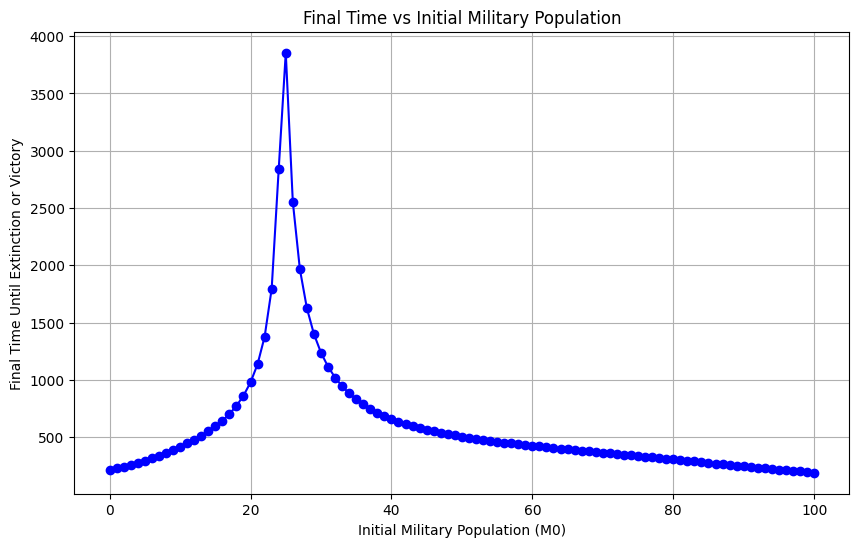

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_zombie_apocalypse(H0, Z0, M0, S, t_max, alpha_HZ, beta_HZ, kappa_HZ, alpha_MZ, beta_MZ, kappa_MZ, kappa_HM):
    # Initialize populations
    H, Z, M = H0, Z0, M0

    # Simulation loop
    for t in range(t_max):
        # Step 1: Human-Zombie encounters
        NHZ = (H * Z) / S
        H_t = H - NHZ * (kappa_HZ + beta_HZ)
        Z_t = Z + NHZ * (kappa_HZ - alpha_HZ)
        M_t = M  # Military unaffected at this stage

        # Step 2: Military-Zombie encounters
        NMZ = (M_t * Z_t) / S
        H_tt = H_t
        Z_tt = Z_t + NMZ * (kappa_MZ - alpha_MZ)
        M_tt = M_t - NMZ * (kappa_MZ + beta_MZ)

        # Step 3: Human-Military encounters
        NHM = (H_tt * M_tt) / S
        H = H_tt - NHM * kappa_HM
        Z = Z_tt
        M = M_tt + NHM * kappa_HM

        # Stopping condition
        if H + M < 1 or Z < 0.9:
            return t

    return t_max

# Parameters
S = 2000  # Total number of cells
H0, Z0 = 500, 1  # Initial populations of humans and zombies
t_max = 5000  # Maximum time steps
alpha_HZ, beta_HZ, kappa_HZ = 0.1, 0.6, 0.3
alpha_MZ, beta_MZ, kappa_MZ = 0.8, 0.1, 0.1
kappa_HM = 0.01  # Probability of a human becoming military

# Vary M0 from 0 to 100
M_values = range(0, 101)
final_times = []

for M0 in M_values:
    final_time = simulate_zombie_apocalypse(H0, Z0, M0, S, t_max,
                                            alpha_HZ, beta_HZ, kappa_HZ,
                                            alpha_MZ, beta_MZ, kappa_MZ,
                                            kappa_HM)
    final_times.append(final_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(M_values, final_times, marker='o', linestyle='-', color='b')
plt.xlabel('Initial Military Population (M0)')
plt.ylabel('Final Time Until Extinction or Victory')
plt.title('Final Time vs Initial Military Population')
plt.grid()
plt.show()

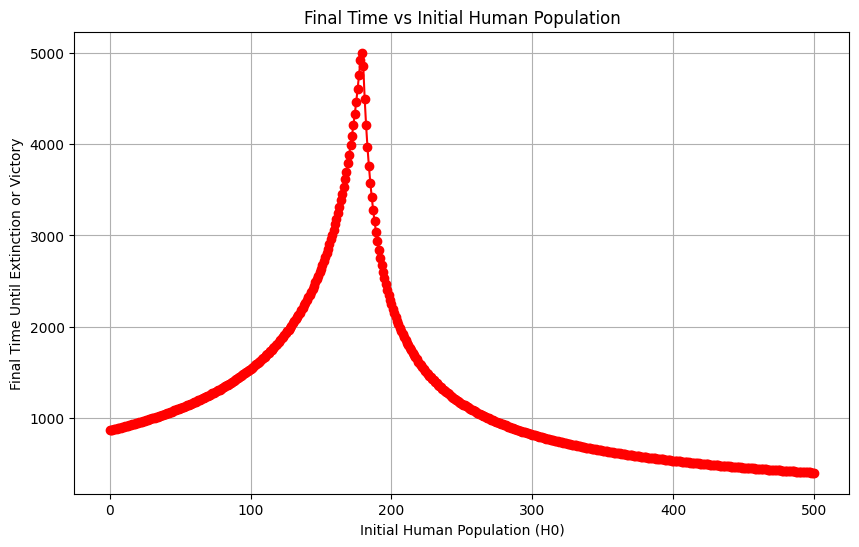

In [ ]:
M0=40

H_values = range(0, 501)
final_times = []

for H0 in H_values:
    final_time = simulate_zombie_apocalypse(H0, Z0, M0, S, t_max,
                                            alpha_HZ, beta_HZ, kappa_HZ,
                                            alpha_MZ, beta_MZ, kappa_MZ,
                                            kappa_HM)
    final_times.append(final_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(H_values, final_times, marker='o', linestyle='-', color='r')
plt.xlabel('Initial Human Population (H0)')
plt.ylabel('Final Time Until Extinction or Victory')
plt.title('Final Time vs Initial Human Population')
plt.grid()
plt.show()

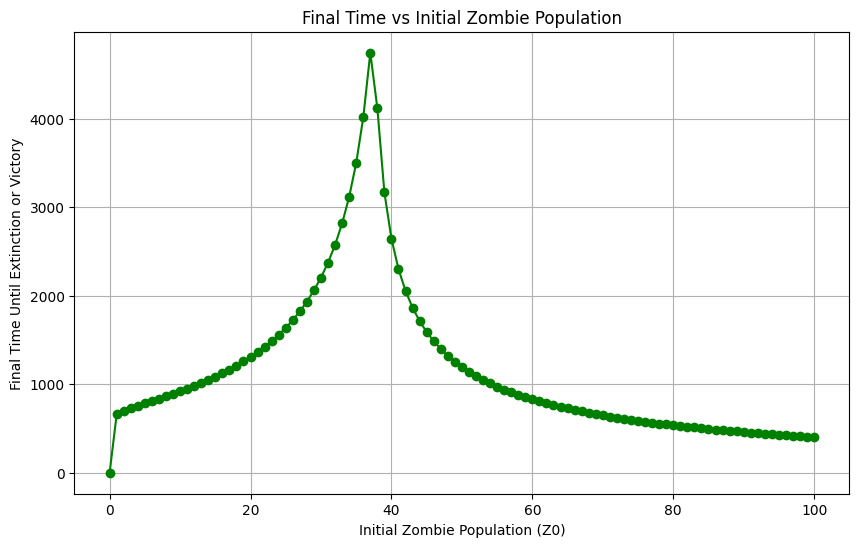

In [ ]:
M0=40
H0=500

Z_values = range(0, 101)
final_times = []

for Z0 in Z_values:
    final_time = simulate_zombie_apocalypse(H0, Z0, M0, S, t_max,
                                            alpha_HZ, beta_HZ, kappa_HZ,
                                            alpha_MZ, beta_MZ, kappa_MZ,
                                            kappa_HM)
    final_times.append(final_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Z_values, final_times, marker='o', linestyle='-', color='g')
plt.xlabel('Initial Zombie Population (Z0)')
plt.ylabel('Final Time Until Extinction or Victory')
plt.title('Final Time vs Initial Zombie Population')
plt.grid()
plt.show()